# **Handling Data Imbalance**
---
## Notebook Overview
This notebook is divided into two parts. In first part, traditional methods are used to tackle data imbalance. In second part, built in library **imblearn** is used to tackle data imbalance. Performance of the linear regession model is compared on original and balanced data obtained using various methods.
1. **Basic methods**
2. **Built-in algorithmic methods**

---

## Understanding Data Imbalance
In a dataset when one of the class occur predominantly than other classes, the dataset is imbalanced. Most of the real world datasets are imbalanced. It appears in many domains, including fraud detection, spam filtering, disease screening,advertising click-throughs, etc.


> #### **Problem with Imbalanced Dataset :**
 Imbalanced data hamper the performance of the model trained on them. Though the model tend to show high accuracy during training, it fails miserably when deployed (*Accuracy Paradox*). For example, if one of the class forms 99% of the dataset, then in such case any basic classification model may get a pretty high accuracy just by predicting the majority class and fail to capture the minority class.

## How to tackle Data Imbalance ?
"Can we Collect More Data?" - Certainly it is not possible or observation time for collecting more data is long. Luckly we have few methods as listed below to address data imbalance problem. Detail explaination of each method is given in corresponding part.
> #### **Basic Methods**:
> 1. Random OverSampling of Minority Class
> 2. Random UnderSampling of Minority Class

> #### **Built-in algorithmic methods**:
> 1. Under-Sampling: Tomek Links
> 2. Synthetic Minority Oversampling Technique (SMOTE)
> 3. Over-sampling using SMOTE and cleaning using ENN



## Notebook Starter

In [1]:
# Importing necessary libraries
# General Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# ML library
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import linear_model

# Data Balancing Library
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

### Loading Data and Data Summary

N Examples: 306
N Inputs: 3
N Classes: 2
Classes: [1 2]
class 1: (225, 4)
class 2: (81, 4)


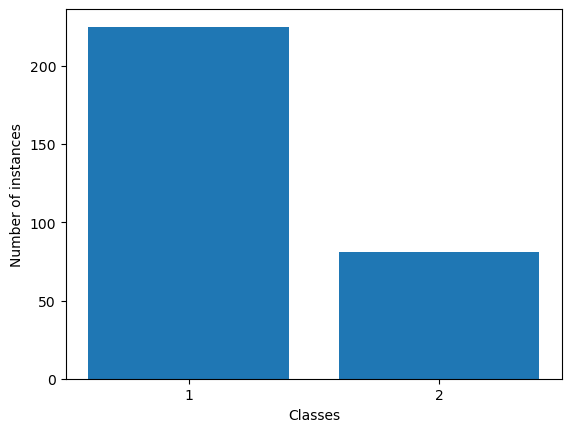

In [3]:
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
df = pd.read_csv(url, header=None)


X, y = df[[0,1,2]], df[3]


# gather details
n_rows = X.shape[0]
n_cols = X.shape[1]
classes = np.unique(y)
n_classes = len(classes)

# summarize
print('N Examples: %d' % n_rows)
print('N Inputs: %d' % n_cols)
print('N Classes: %d' % n_classes)
print('Classes: %s' % classes)
class1_count, class2_count = df[3].value_counts()

# Separate class
class1 = df[df[3] == 1]
class2 = df[df[3] == 2]
# print the shape of the class
print('class 1:', class1.shape)
print('class 2:', class2.shape)

# Bar plot
plt.bar(['1','2'], df[3].value_counts())
plt.xlabel("Classes")
plt.ylabel("Number of instances")
plt.show()

In [6]:
# Train and test model

def trainAndTest(X, y, strategy, use_strag):
  np.random.seed(5)
  # split into train/test sets with same class ratio
  trainX, testX, trainy, testy = model_selection.train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

  #Apply sampling technique if any
  if use_strag:
    trainX, trainy = strategy.fit_resample(trainX, trainy)
  # define model
  model = linear_model.LogisticRegression(solver='liblinear')
  # fit model
  model.fit(trainX, trainy)
  # predict on test set
  yhat = model.predict(testX)
  # evaluate predictions
  acc = metrics.accuracy_score(testy, yhat)
  prec = metrics.precision_score(testy, yhat)
  recall = metrics.recall_score(testy, yhat)
  f1_score = metrics.f1_score(testy, yhat)

  return trainX, trainy, acc, prec, recall, f1_score

trainAndTest(X, y, None, False)

(      0   1   2
 167  54  60  11
 177  54  63  19
 159  53  60   9
 106  47  66  12
 189  55  67   1
 ..   ..  ..  ..
 153  52  64   0
 277  67  61   0
 158  53  59   3
 20   37  58   0
 297  73  62   0
 
 [244 rows x 3 columns],
 167    2
 177    1
 159    2
 106    1
 189    1
       ..
 153    1
 277    1
 158    2
 20     1
 297    1
 Name: 3, Length: 244, dtype: int64,
 0.6935483870967742,
 0.7368421052631579,
 0.9130434782608695,
 0.8155339805825242)

## Basic Methods


### Random OverSampling and UnderSampling

In [7]:
# Random Under Sampling of Majority class
np.random.seed(5)
trainX, testX, trainy, testy = model_selection.train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

df = pd.concat([trainX, trainy], axis=1)
class1 = df[df[3] == 1]
class2 = df[df[3] == 2]

class1_count , class2_count = trainy.value_counts()
class1_under = class1.sample(class2_count)

df_under = pd.concat([class1_under, class2], axis=0)

print("Total class of 1 and 2 after Undersampling of majority class: \n",df_under[3].value_counts())
trainXu, trainyu = df_under[[0, 1, 2]], df_under[3]
model = linear_model.LogisticRegression(solver='liblinear')
# fit model
model.fit(trainXu, trainyu)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
acc_under = metrics.accuracy_score(testy, yhat)
prec_under = metrics.precision_score(testy, yhat)
recall_under = metrics.recall_score(testy, yhat)
f1_score_under = metrics.f1_score(testy, yhat)



Total class of 1 and 2 after Undersampling of majority class: 
 3
1    65
2    65
Name: count, dtype: int64


In [8]:
# Random Over Sampling of Minority Class
np.random.seed(5)
trainX, testX, trainy, testy = model_selection.train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

df = pd.concat([trainX, trainy], axis=1)
class1 = df[df[3] == 1]
class2 = df[df[3] == 2]

class1_count , class2_count = trainy.value_counts()
class2_over = class2.sample(class1_count, replace=True)

df_over = pd.concat([class2_over, class1], axis=0)

print("Total class of 1 and 2 after Oversampling of minority class: \n",df_over[3].value_counts())
trainXo, trainyo = df_over[[0, 1, 2]], df_over[3]
model = linear_model.LogisticRegression(solver='liblinear')
# fit model
model.fit(trainXo, trainyo)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
acc_over = metrics.accuracy_score(testy, yhat)
prec_over = metrics.precision_score(testy, yhat)
recall_over = metrics.recall_score(testy, yhat)
f1_score_over = metrics.f1_score(testy, yhat)

Total class of 1 and 2 after Oversampling of minority class: 
 3
2    179
1    179
Name: count, dtype: int64


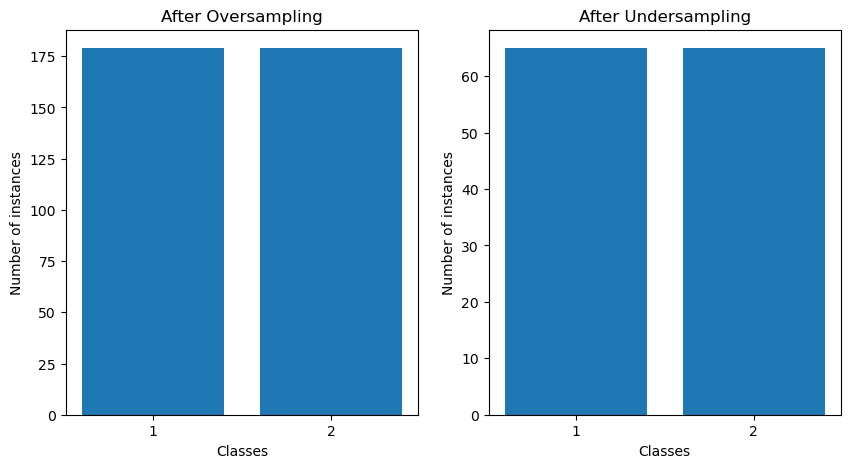

In [9]:
# Plotting
fig, ax = plt.subplots(1, 2,figsize=(10,5))
ax[0].bar(["1", "2"], trainyo.value_counts())
ax[0].set_title("After Oversampling")
ax[0].set(xlabel = "Classes", ylabel = "Number of instances")

ax[1].bar(["1", "2"], trainyu.value_counts())
ax[1].set_title("After Undersampling")
ax[1].set(xlabel = "Classes", ylabel = "Number of instances")

plt.show()

> Popular alternatives for the accuracy are the precision, recall and f1 scores that allow the performance of the model to be considered by focusing on the minority class.




**Result :** Random Oversampling and Undersampling is not much of the help. In case of Random Oversampling, we may tend to overfit minority class. Similarly in case of Random Undersampling, we tend to lose useful information in data.

## Built-in algorithmic methods
1. **Tomek links :** Tomek links are pairs of very close instances but of different classes. This method removes the instances of the majority class of those pairs. Thus undersampling majority class and increasing the space between the different classes which in turn facilitate the classification process.

2. **Synthetic Minority Oversampling Technique (SMOTE) :**This method aims to oversample the minority class. But instead of random oversampling, SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.
3. **Over-sampling using SMOTE and cleaning using ENN :**This method combines the SMOTE ability to generate synthetic examples for minority class and ENN ability to delete some observations. In from both classes that are identified as having different class between the observation’s class and its K-nearest neighbor majority class.

In [10]:
def technique(X,y):

  # summarize class distribution
  print("Original :",Counter(y))

  ### TomekLinks
  undersample = TomekLinks()

  ### SMOTE
  oversample = SMOTE(sampling_strategy=0.5)

  ### SMOTEENN
  sample = SMOTEENN(sampling_strategy=0.5)

  ### Evaluation
  X, y, acc_orig, prec_orig, recall_orig, f1_orig = trainAndTest(X, y,False,False)
  X_over, y_over, acc_over, prec_over, recall_over, f1_over = trainAndTest(X, y, oversample, True )
  X_under, y_under, acc_under, prec_under, recall_under, f1_under = trainAndTest(X, y, undersample, True)
  X_uo, y_uo, acc_both, prec_both, recall_both, f1_both = trainAndTest(X, y, sample, True)

  df_result = pd.DataFrame({
    'Accuracy': [acc_orig, acc_over, acc_under, acc_both],
    'Precision': [prec_orig, prec_over, prec_under, prec_both],
    'Recall': [recall_orig, recall_over, recall_under, recall_both],
    'F1_score': [f1_orig, f1_over, f1_under, f1_both]
  })

  df_result.index = ['Original data', 'SMOTE', 'TomekLinks', 'SMOTEENN']

  ### Plotting

  fig, ax = plt.subplots(2, 2,figsize=(10,10))

  ax[0, 0].bar(["1","2"], y.value_counts())
  ax[0, 0].set_title("Original Dataset")
  ax[0, 1].bar(["1","2"], y_over.value_counts())
  ax[0, 1].set_title("SMOTE")
  ax[1, 0].bar(["1","2"], y_under.value_counts())
  ax[1, 0].set_title("TomekLinks")
  ax[1, 1].bar(["1","2"], y_uo.value_counts())
  ax[1, 1].set_title("SMOTEENN")
  plt.show()

  fig, ax = plt.subplots(2, 2,figsize=(10,10))

  ax[0, 0].scatter(X[0], X[2], c = y)
  ax[0, 0].set_title("Original Dataset")
  ax[0, 1].scatter(X_over[0], X_over[2], c = y_over)
  ax[0, 1].set_title("After Oversampling")
  ax[1, 0].scatter(X_under[0], X_under[2], c = y_under)
  ax[1, 0].set_title("After Undersampling")
  ax[1, 1].scatter(X_uo[0], X_uo[2], c = y_uo)
  ax[1, 1].set_title("After Over and Under sampling")

  plt.show()

  return df_result


Original : Counter({1: 225, 2: 81})


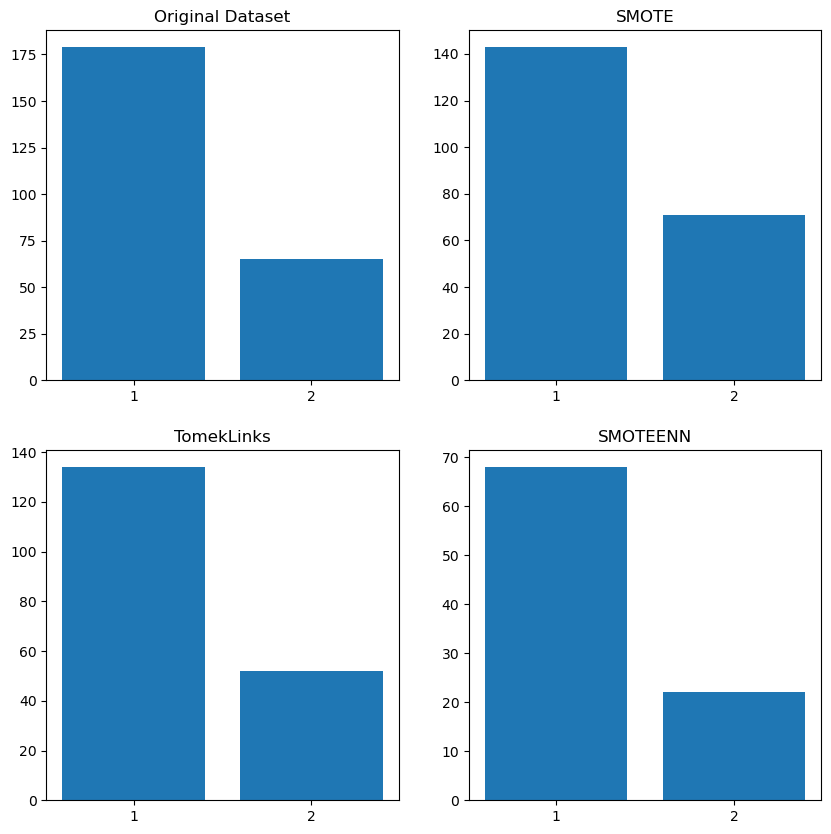

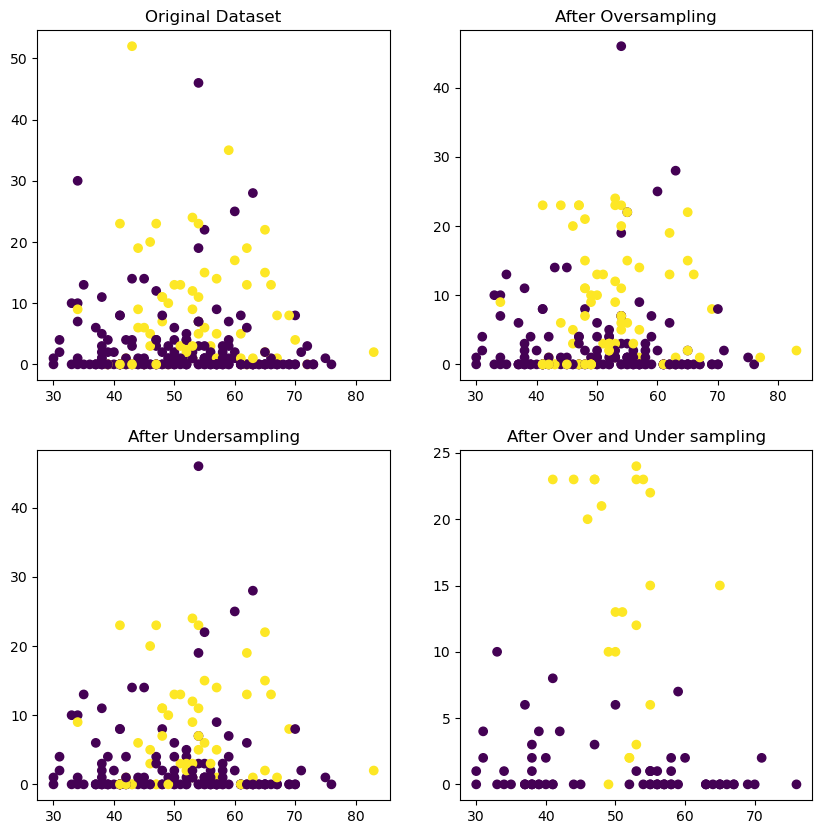

In [11]:
result = technique(X,y)

In [12]:
print("Result Comparision")
result

Result Comparision


,Accuracy,Precision,Recall,F1_score
Original data,0.693548,0.736842,0.913043,0.815534
SMOTE,0.795918,0.795455,0.972222,0.875000
TomekLinks,0.795918,0.795455,0.972222,0.875000
SMOTEENN,0.816327,0.846154,0.916667,0.880000


**Result :**
1. All the built in methods are performing better than the basic methods. Also combined undersampling and oversampling method (SMOTEENN) produces better results compared to just applying either of one.
2. Performing SMOTE+ENN is effective because performing SMOTE alone can lead to the creation of noisy and irrelevant synthetic samples in regions of feature space where the minority class is highly concentrated. This can result in overfitting and reduced generalization performance of the model. SMOTENN (SMOTE-ENN) is a variant of SMOTE that addresses this limitation by combining SMOTE with the Edited Nearest Neighbors (ENN) technique. ENN is a data filtering technique that removes noisy and irrelevant samples from the dataset.


**Note:**
1. Performance of SMOTEENN is affected when there are many outliers or mislabeled examples in the minority class, the edited nearest neighbors step may remove legitimate minority class instances, leading to a loss of valuable information.
2. Built in ML libraries' algorithm have in built method to address the class imbalance problem rather than using external function to address it. Can find the those in resource session.

## References & Further reading:
* [Introduction to Data Imbalance](https://machinelearningmastery.com/what-is-imbalanced-classification/)
* [Other Resource](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)
